The path s3://s00-spatial.catalyst-team/tutorials/sparrow_notebook/try/sdata_vib_compute_example_4_06.zarr exists.
s3://s00-spatial.catalyst-team/tutorials/sparrow_notebook/try/sdata_vib_compute_example_4_06.zarr/.zgroup
s3://s00-spatial.catalyst-team/tutorials/sparrow_notebook/try/sdata_vib_compute_example_4_06.zarr/zmetadata
s3://s00-spatial.catalyst-team/tutorials/sparrow_notebook/try/sdata_vib_compute_example_4_06.zarr/images
s3://s00-spatial.catalyst-team/tutorials/sparrow_notebook/try/sdata_vib_compute_example_4_06.zarr/labels
s3://s00-spatial.catalyst-team/tutorials/sparrow_notebook/try/sdata_vib_compute_example_4_06.zarr/points
s3://s00-spatial.catalyst-team/tutorials/sparrow_notebook/try/sdata_vib_compute_example_4_06.zarr/shapes
s3://s00-spatial.catalyst-team/tutorials/sparrow_notebook/try/sdata_vib_compute_example_4_06.zarr/tables
INFO     The SpatialData object is not self-contained (i.e. it contains some elements that are Dask-backed from    
         locations outside    

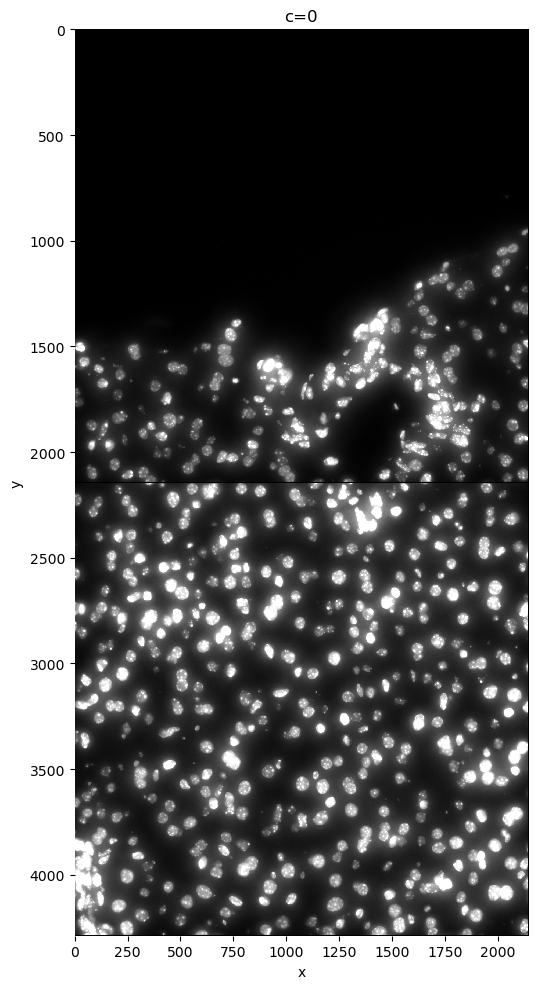

In [2]:
import os

from dotenv import load_dotenv
from spatialdata import read_zarr
from upath import UPath

import harpy

load_dotenv()

# copied to object store via:
# mc cp -r sdata_vib_compute_example.zarr ObjectStorage/spatial.catalyst-team/tutorials/sparrow_notebook/try

s3_endpoint_url = "https://objectstor.vib.be"

bucket_name = "s00-spatial.catalyst-team"
zarr_store_path = "tutorials/sparrow_notebook/try/sdata_vib_compute_example_4_06.zarr"

s3_path = f"s3://{bucket_name}/{zarr_store_path}"

access_key = os.environ.get("ACCESS_KEY")
secret_key = os.environ.get("SECRET_KEY")

# Create a UPath object for the .zarr folder with authentication
# Change anon to False for private buckets, and provide access_key and secrey_key
path = UPath(s3_path, anon=False, key=access_key, secret=secret_key, client_kwargs={"endpoint_url": s3_endpoint_url})

if path.exists():
    print(f"The path {s3_path} exists.")
    for item in path.iterdir():
        print(item)
else:
    print(f"The path {s3_path} does not exist.")

sdata = read_zarr(store=path, selection=["images"])

harpy.pl.plot_image(sdata, img_layer="raw_image")